#### Importing all the necessary liraries that are useful for our analysis

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro,levene, ttest_ind, mannwhitneyu


#### Importing the EV dataset into python

In [143]:
df = pd.read_excel('FEV-data-Excel.xlsx')

In [144]:
df.describe() # statistical analysis

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,45.000000,45.000000,53.000000,53.000000,53.000000,53.000000,52.000000,50.00000,53.000000,44.000000
mean,246158.509434,269.773585,460.037736,62.366038,376.905660,273.581132,442.509434,186.241509,155.422642,1868.452830,2288.844444,520.466667,4.905660,4.849057,17.679245,178.169811,445.096154,7.36000,113.509434,18.994318
std,149187.485190,181.298589,261.647000,24.170913,118.817938,22.740518,48.863280,14.280641,11.275358,470.880867,557.796026,140.682848,0.838133,0.455573,1.868500,43.056196,180.178480,2.78663,57.166970,4.418253
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,290.000000,2.000000,3.000000,14.000000,123.000000,171.000000,2.50000,22.000000,13.100000
25%,142900.000000,136.000000,260.000000,40.000000,289.000000,258.800000,411.800000,178.800000,148.100000,1530.000000,1916.000000,440.000000,5.000000,5.000000,16.000000,150.000000,315.000000,4.87500,100.000000,15.600000
50%,178400.000000,204.000000,362.000000,58.000000,364.000000,270.000000,447.000000,180.900000,155.600000,1685.000000,2119.000000,486.000000,5.000000,5.000000,17.000000,160.000000,425.000000,7.70000,100.000000,17.050000
75%,339480.000000,372.000000,640.000000,80.000000,450.000000,290.000000,490.100000,193.500000,161.500000,2370.000000,2870.000000,575.000000,5.000000,5.000000,19.000000,200.000000,558.000000,9.37500,150.000000,23.500000
max,794000.000000,772.000000,1140.000000,100.000000,652.000000,327.500000,514.000000,255.800000,191.000000,2710.000000,3500.000000,1056.000000,8.000000,5.000000,21.000000,261.000000,870.000000,13.10000,270.000000,28.200000


In [145]:
df.shape

(53, 25)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


#### Analysis:
- There are missing values in dataset.

In [148]:
df.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

#### Analysis:
- Columns like 'Type of brakes', 'Permissable gross weight [kg]', 'Maximum load capacity [kg]', 'Boot capacity (VDA) [l]', 'Acceleration 0-100 kph [s]', 'mean - Energy consumption [kWh/100 km]' has missing values. 

In [150]:
(df.isnull().sum()/len(df.index))*100

Car full name                              0.000000
Make                                       0.000000
Model                                      0.000000
Minimal price (gross) [PLN]                0.000000
Engine power [KM]                          0.000000
Maximum torque [Nm]                        0.000000
Type of brakes                             1.886792
Drive type                                 0.000000
Battery capacity [kWh]                     0.000000
Range (WLTP) [km]                          0.000000
Wheelbase [cm]                             0.000000
Length [cm]                                0.000000
Width [cm]                                 0.000000
Height [cm]                                0.000000
Minimal empty weight [kg]                  0.000000
Permissable gross weight [kg]             15.094340
Maximum load capacity [kg]                15.094340
Number of seats                            0.000000
Number of doors                            0.000000
Tire size [i

#### Analysis:
There are more number of missing values in 3 columns i.e 'Permissable gross weight [kg]', 'Maximum load capacity [kg]', 'mean - Energy consumption [kWh/100 km]'

#### Distribution Analysis:
To understand the shape of data and choose the correct imputation strategy, I plotted histograms and boxplots for all numerical columns.

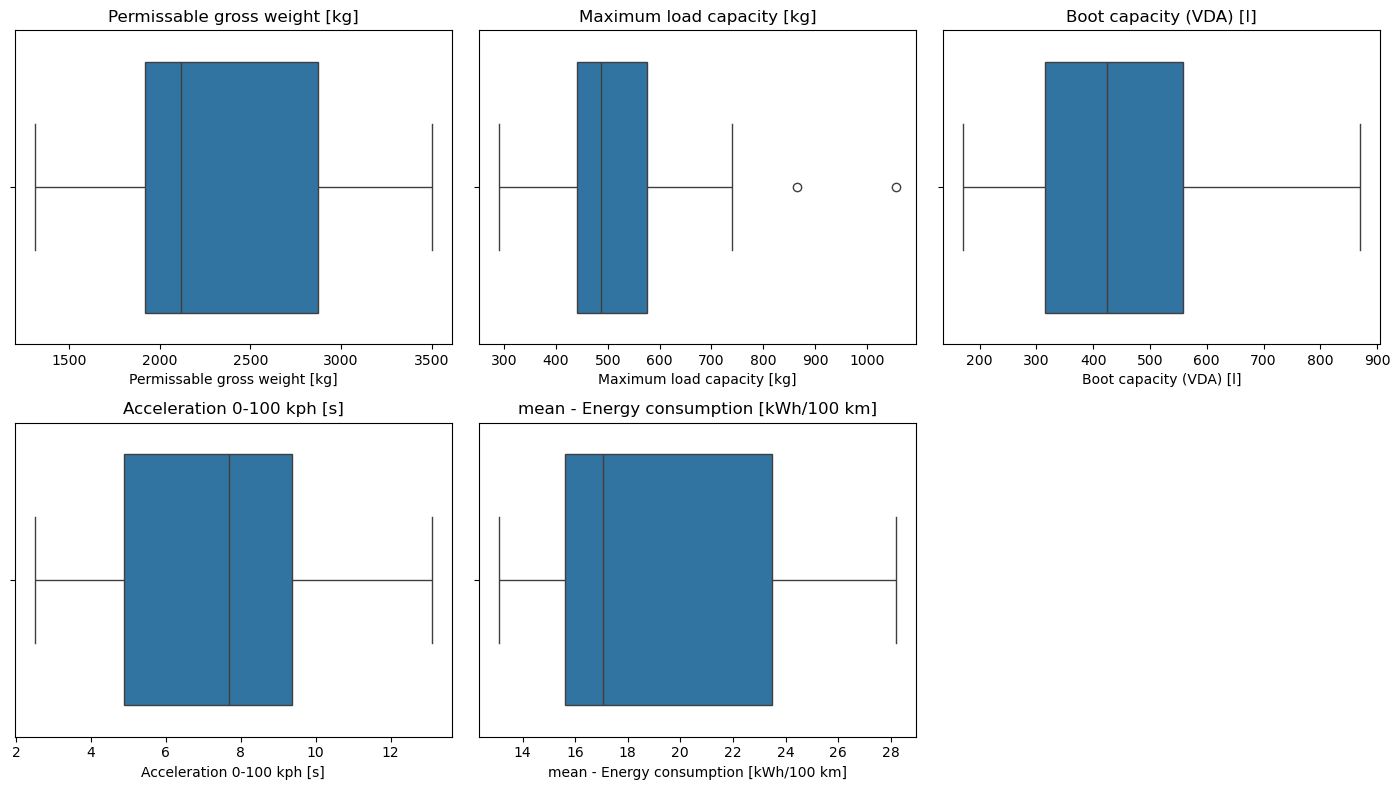

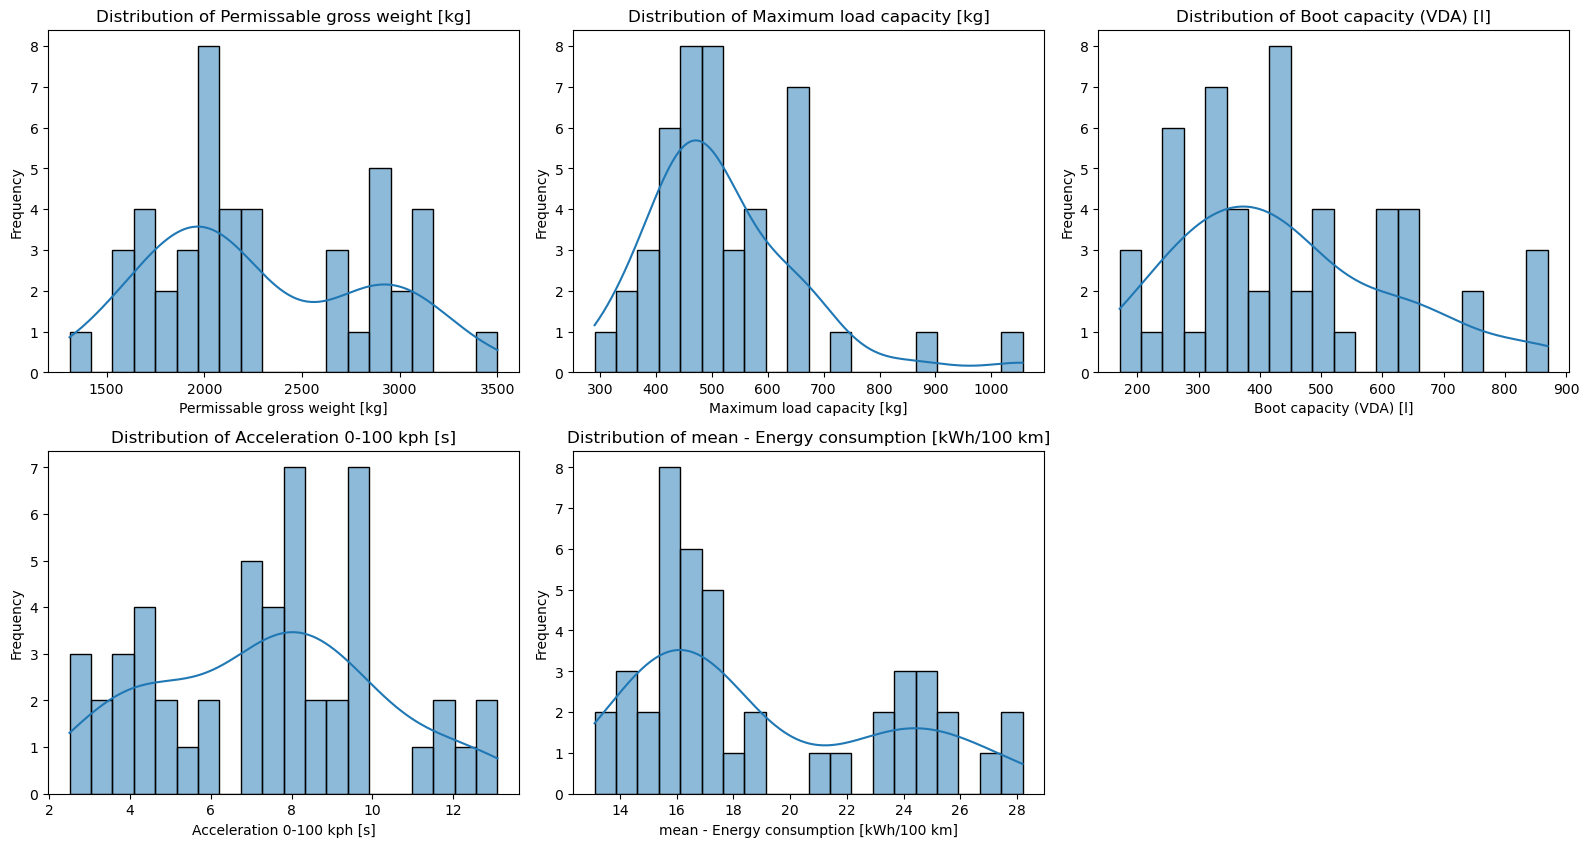

In [153]:
numeric_cols = [
    'Permissable gross weight [kg]',
    'Maximum load capacity [kg]',
    'Boot capacity (VDA) [l]',
    'Acceleration 0-100 kph [s]',
    'mean - Energy consumption [kWh/100 km]'
]

plt.figure(figsize=(14, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 25))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 3, i)  # adjust rows/cols based on number of columns
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Analysis:
- All five numerical columns with missing values show mild-to-moderate skewness.
- Maximum load capacity has strong outliers, visible in the boxplot.
- Acceleration and energy consumption columns are right-skewed, typical for EVs.
- Because of these characteristics, median imputation is the most appropriate choice for handling missing values.
- for categorical column like types of brake, mode imputation is better option.

In [155]:
numeric_cols = [
    'Permissable gross weight [kg]',
    'Maximum load capacity [kg]',
    'Boot capacity (VDA) [l]',
    'Acceleration 0-100 kph [s]',
    'mean - Energy consumption [kWh/100 km]'
]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df['Type of brakes'] = df['Type of brakes'].fillna(df['Type of brakes'].mode()[0])


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          53 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


#### Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
- a) Your task is to filter out EVs that meet these criteria.
- b) Group them by the manufacturer (Make).
- c) Calculate the average battery capacity for each manufacturer.

In [158]:
cust_choice = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400 )]
cust_choice

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,2119.0,486.0,5,5,18,225,425.0,5.6,150,17.05
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,2119.0,486.0,5,5,18,233,425.0,4.4,150,17.05
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,2119.0,486.0,5,5,20,261,425.0,3.3,150,17.05
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


##### Analysis:
- There are only 12 cars whose range is >= 400 km and price is <= 350000 PLN.  
- These include brands like Audi,BMW,Hyundai,Kia,Mercedes-Benz,Tesla,Volkswagen.This means that there is very high competition in mid-range EV segment.   
- Tesla and Volkswagen stand out for delivering high range at competitive prices.
- Most of the brands offer higher range between 430-580 km making it suitable for highways as well as cities.

In [160]:
grouped = cust_choice.groupby('Make')

In [161]:
grouped['Battery capacity [kWh]'].mean()

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

##### Analysis:
- Premium brands like Audi, BMW, Mercedes-Benz has more battery capacity although their range is less.
- Tesla and Volkswagen offer higher range although their battery capacity is less.

#### Task 2: 
You suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean - Energy consumption [kWh/100 km] column.

In [164]:
Q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < LB) | (df['mean - Energy consumption [kWh/100 km]'] > UB)]
outliers

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


In [165]:
df['mean - Energy consumption [kWh/100 km]'].describe()

count    53.000000
mean     18.664151
std       4.084791
min      13.100000
25%      15.900000
50%      17.050000
75%      21.850000
max      28.200000
Name: mean - Energy consumption [kWh/100 km], dtype: float64

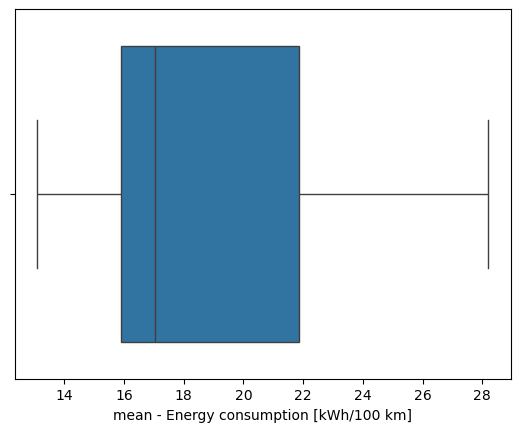

In [166]:
sns.boxplot(x=df['mean - Energy consumption [kWh/100 km]'])
plt.show()

#### Analysis:
- Using the IQR method, no outliers were detected in the mean energy consumption (kWh/100 km) column.
- This indicates that the EV energy consumption values are consistent across models and fall within the expected range for electric vehicles (typically 14–25 kWh/100 km).
- The data appears clean, with no unusually high or low energy usage values.

#### Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
a) Create a suitable plot to visualize.   
b) Highlight any insights.   )

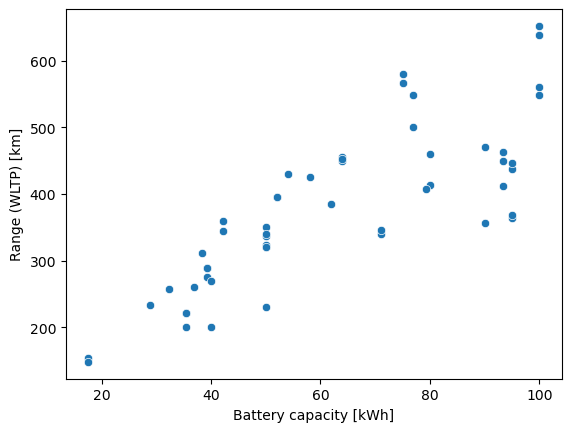

In [169]:
sns.scatterplot(x=df['Battery capacity [kWh]'], y=df['Range (WLTP) [km]'])
plt.show()

#### Analysis:
The scatter plot is used to show relationship between 2 variables. It shows a clear positive correlation between battery capacity and driving range. EVs with larger batteries consistently achieve higher ranges. However, cars with similar battery capacities show range variations, indicating that efficiency, vehicle design, and aerodynamics also play important roles. No significant outliers are present, and the trend supports that battery capacity is a strong predictor of range in electric vehicles.

#### Task 4: Build an EV recommendation class.
The class should allow users to input their 
budget, desired range, and battery capacity. The class should then return the top three EV 
matching their criteria.

In [172]:
import pandas as pd

class EVRecommender:
    """
    Simple recommender for EVs based on:
    - budget (max price in PLN)
    - desired range (min WLTP range in km)
    - desired battery capacity (min kWh)
    """

    def __init__(self, df: pd.DataFrame):
        # store a copy so original df is not modified
        self.df = df.copy()

    def recommend(self, budget: float, min_range: float, min_battery: float, top_n: int = 3):
        """
        Returns top_n EVs that:
        - cost <= budget
        - have range >= min_range
        - have battery capacity >= min_battery

        EVs are sorted by:
        1) higher range first
        2) lower price (tie-breaker)
        """
        mask = (
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)
        )

        filtered = self.df[mask].copy()

        if filtered.empty:
            print("No EVs match the given criteria.")
            return filtered  # empty DataFrame

        # sort: highest range first, then lowest price
        filtered = filtered.sort_values(
            by=['Range (WLTP) [km]', 'Minimal price (gross) [PLN]'],
            ascending=[False, True]
        )

        cols_to_show = [
            'Car full name',
            'Make',
            'Model',
            'Minimal price (gross) [PLN]',
            'Battery capacity [kWh]',
            'Range (WLTP) [km]'
        ]

        return filtered[cols_to_show].head(top_n)


In [173]:
recommender = EVRecommender(df)

top_cars = recommender.recommend(
    budget=300000,
    min_range=400,
    min_battery=60
)

top_cars


,Car full name,Make,Model,Minimal price (gross) [PLN],Battery capacity [kWh],Range (WLTP) [km]
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,75.0,580
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,75.0,567
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,77.0,549


#### Analysis:
- I have created EVRecommender class which will recommend user top 3 EV's based on price, battery capacity and range which user wants.First priority is given to range and second priority is given to price, so it will return EV's based on these things.

#### Task 5: Inferential Statistics – Hypothesis Testing
Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
Recommendations and Conclusion: Provide actionable insights based on your analysis. (Conduct a two sample t-test using ttest_ind from scipy.stats module)

- Null Hypothesis: Average Engine Power of Tesla  = Average Engine Power of Audi
- Alternate Hypothesis:  Average Engine Power of Tesla  != Average Engine Power of Audi
- significance level = 5%

In [177]:
sam1 = df[df['Make'] == 'Audi']     # filtered out Audi data
sam1_avg = sam1['Engine power [KM]'].mean()  # average engine power of Audi
sam2 = df[df['Make'] == 'Tesla']   # filtered out Tesla data
sam2_avg = sam2['Engine power [KM]'].mean()  # average engine power of Tesla

# checking whether both samples are normal or not using Shakiro Wilk test
stat_audi, p_audi = shapiro(sam1['Engine power [KM]'])
stat_tesla, p_tesla = shapiro(sam2['Engine power [KM]'])
print("p-value of audi for normality check:",p_audi)
print("p-value of tesla for normality check:",p_tesla)

# Normality assumption fails, so we will perform Mann Whitney U Rank test
u_stat, p_value = mannwhitneyu(sam1['Engine power [KM]'], sam2['Engine power [KM]'], alternative='two-sided')
print("p-value for mann whitney u rank test:",p_value) # p=13% > 5% so we fail to reject null hypothesis.

# But in task it is mentioned to perform ttest_ind test although normality assumption failed, therefore i am performing ttest_ind test
# first we will perform Lavene's test to pero
stat , p_val = levene(sam1['Engine power [KM]'], sam2['Engine power [KM]'])
print("p-value for variance equality check:",p_val) # p=0.21 > 0.05 which means that variance are equal

# performing ttest_ind test
stat, p_val = ttest_ind(sam1['Engine power [KM]'], sam2['Engine power [KM]'], equal_var=True)
print("p-value for ttest_ind:",p_val) # p=0.11 > 0.05 so we fail to reject null hypothesis

p-value of audi for normality check: 0.04407741501927376
p-value of tesla for normality check: 0.3819012939929962
p-value for mann whitney u rank test: 0.13093895003234252
p-value for variance equality check: 0.21961763884678553
p-value for ttest_ind: 0.11672692675082785


#### Analysis:
- Conclusion: Both the t-test (as required) and the Mann–Whitney U test show that there is no statistically significant difference in the average Engine Power between Tesla and Audi vehicles in this dataset. p-values from both methods are greater than 0.05, meaning we fail to reject the null hypothesis.
- Tesla and Audi offer comparable engine power in their EV segments.
- Audi’s vehicles may appear slightly more varied (due to non-normal distribution), but average performance remains similar.
- Customers choosing between Tesla and Audi should focus on:  
range  
price  
charging speed  
features  
rather than engine power.